In [1]:
#import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
data = pd.read_csv('../zillow-carlifornia .csv', parse_dates=True, squeeze=True)
data.shape

(164, 5)

In [31]:
data.tail(50)

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
114,2013-07-31,385600.0,4.37,7.4,1750.0
115,2013-08-31,382550.0,4.47,7.6,1695.0
116,2013-09-30,380525.0,4.14,6.4,1800.0
117,2013-10-31,379850.0,4.04,6.4,1895.0
118,2013-11-30,380900.0,4.30,6.5,1825.0
119,2013-12-31,379600.0,4.47,6.7,1900.0
120,2014-01-31,369425.0,4.21,7.4,1900.0
121,2014-02-28,366950.0,4.22,7.4,1850.0
122,2014-03-31,377975.0,4.30,7.4,1850.0
123,2014-04-30,389700.0,4.21,7.3,1850.0


In [4]:
ignore_size = 60
ignore = data['MedianSoldPrice_AllHomes.California'][:ignore_size]
data_ = data['MedianSoldPrice_AllHomes.California'][ignore_size:].dropna()
X = data['MedianSoldPrice_AllHomes.California'][ignore_size:].dropna()
forecast = data['MedianSoldPrice_AllHomes.California'][144:174]

In [5]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [6]:
adf_test(data_)

Results of Dickey-Fuller Test:
Test Statistic                 -1.573955
p-value                         0.496662
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [13]:
ignore

0     326752.55
1     329501.50
2     340125.45
3     355329.50
4     367818.15
5     378461.35
6     381175.00
7     381925.00
8     383775.00
9     385900.00
10    391850.00
11    397000.00
12    399050.00
13    401650.00
14    411250.00
15    420102.00
16    429251.40
17    440250.60
18    447225.00
19    452275.00
20    454250.00
21    455000.00
22    457500.00
23    458250.00
24    454300.00
25    454700.00
26    462450.00
27    465550.00
28    468250.00
29    474250.00
30    476000.00
31    475500.00
32    469825.00
33    466675.00
34    467677.00
35    473328.40
36    471304.00
37    472652.00
38    480802.60
39    487403.40
40    492352.00
41    496250.60
42    498400.00
43    494418.50
44    473794.95
45    457726.95
46    453250.60
47    446750.00
48    434750.00
49    432250.00
50    431002.00
51    433251.40
52    431750.60
53    428252.00
54    425501.40
55    414827.60
56    392927.90
57    380751.65
58    369875.45
59    363675.00
Name: MedianSoldPrice_AllHomes.Californi

In [8]:
data_.head(3)

60    344951.50
61    336652.55
62    334101.50
Name: MedianSoldPrice_AllHomes.California, dtype: float64

In [9]:
train_size = int(len(X) * 0.8)
train, test = data['MedianSoldPrice_AllHomes.California'][ignore_size:].dropna(), data['MedianSoldPrice_AllHomes.California'][ignore_size+train_size:].dropna()
forecast = data['MedianSoldPrice_AllHomes.California'][144:174]

In [14]:
ignore

0     326752.55
1     329501.50
2     340125.45
3     355329.50
4     367818.15
5     378461.35
6     381175.00
7     381925.00
8     383775.00
9     385900.00
10    391850.00
11    397000.00
12    399050.00
13    401650.00
14    411250.00
15    420102.00
16    429251.40
17    440250.60
18    447225.00
19    452275.00
20    454250.00
21    455000.00
22    457500.00
23    458250.00
24    454300.00
25    454700.00
26    462450.00
27    465550.00
28    468250.00
29    474250.00
30    476000.00
31    475500.00
32    469825.00
33    466675.00
34    467677.00
35    473328.40
36    471304.00
37    472652.00
38    480802.60
39    487403.40
40    492352.00
41    496250.60
42    498400.00
43    494418.50
44    473794.95
45    457726.95
46    453250.60
47    446750.00
48    434750.00
49    432250.00
50    431002.00
51    433251.40
52    431750.60
53    428252.00
54    425501.40
55    414827.60
56    392927.90
57    380751.65
58    369875.45
59    363675.00
Name: MedianSoldPrice_AllHomes.Californi

In [10]:
train

60     344951.50
61     336652.55
62     334101.50
63     335000.45
64     342500.00
         ...    
139    426650.00
140    421750.00
141    417400.00
142    420450.00
143    421000.00
Name: MedianSoldPrice_AllHomes.California, Length: 84, dtype: float64

In [11]:
test

127    404850.0
128    402000.0
129    399150.0
130    398475.0
131    394275.0
132    386350.0
133    386500.0
134    395000.0
135    407550.0
136    416050.0
137    424400.0
138    428000.0
139    426650.0
140    421750.0
141    417400.0
142    420450.0
143    421000.0
Name: MedianSoldPrice_AllHomes.California, dtype: float64

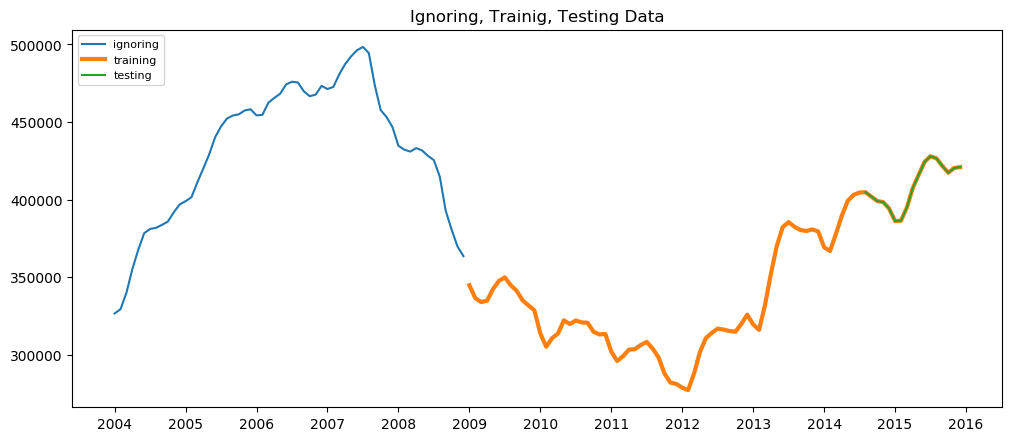

In [32]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(ignore, label='ignoring')
plt.plot(train, label='training',linewidth=3.0)
plt.plot(test, label='testing')
plt.title('Ignoring, Trainig, Testing Data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

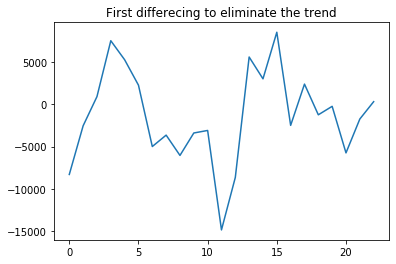

Results of Dickey-Fuller Test:
Test Statistic                 -3.141164
p-value                         0.023653
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [17]:
#first differecing the trend
d1 = list()
for i in range(61, len(X)):
    value = X[i] - X[i - 1]
    d1.append(value)

plt.title('First differecing to eliminate the trend')
plt.plot(d1) 
pyplot.show()

adf_test(d1)


In [18]:
#Auto arima

In [19]:
#d=1 and no seasonal
model_1 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_1.summary())
fitted_1 = model_1.fit(train)

fc_1, conf_1 = fitted_1.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_1 = pd.Series(fc_1, index=test.index)

Fit ARIMA: order=(1, 1, 1); AIC=1658.235, BIC=1667.910, Fit time=0.155 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1702.409, BIC=1707.247, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1665.429, BIC=1672.686, Fit time=0.102 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1662.635, BIC=1669.891, Fit time=0.042 seconds
Fit ARIMA: order=(2, 1, 1); AIC=1658.762, BIC=1670.856, Fit time=0.141 seconds
Fit ARIMA: order=(1, 1, 2); AIC=1659.178, BIC=1671.272, Fit time=0.134 seconds
Fit ARIMA: order=(2, 1, 2); AIC=1659.826, BIC=1674.339, Fit time=0.320 seconds
Total fit time: 0.899 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -825.118
Method:                       css-mle   S.D. of innovations           5004.239
Date:                Fri, 06 Dec 2019   AIC                           1658.235
Time:                 

In [20]:
mse_1 = ((fc_series_1 - test) ** 2).mean()
rmse_1 =round(np.sqrt(mse_1), 2)
print(rmse_1)

20112.62


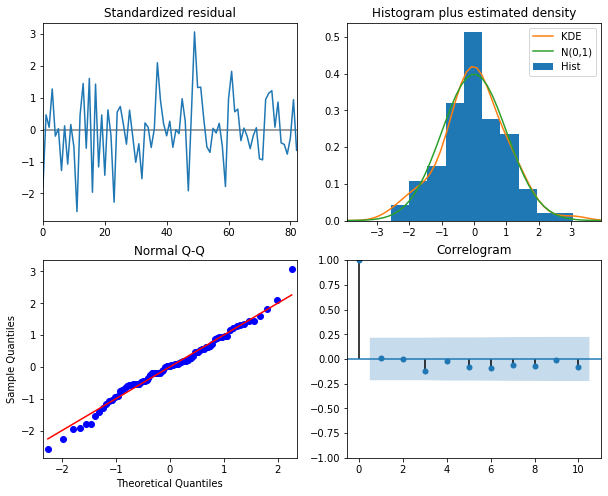

In [33]:
model_1.plot_diagnostics(figsize=(10,8))
plt.show()

In [21]:
#(2, 1, 12)
model_2 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_2.summary())
fitted_2 = model_2.fit(train)
fc_2, conf_2 = fitted_2.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_2 = pd.Series(fc_2, index=test.index)

Fit ARIMA: order=(1, 2, 1); AIC=1649.674, BIC=1659.301, Fit time=0.149 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1660.543, BIC=1665.356, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1661.800, BIC=1669.020, Fit time=0.057 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1661.022, BIC=1668.242, Fit time=0.012 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1640.708, BIC=1652.742, Fit time=0.143 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1656.498, BIC=1666.125, Fit time=0.126 seconds
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=0.074 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1653.237, BIC=1670.084, Fit time=0.243 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1642.708, BIC=1657.148, Fit time=0.353 seconds
Total fit time: 1.162 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   82
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -815.354
Method:                       cs

In [22]:
mse_2 = ((fc_series_2 - test) ** 2).mean()
rmse_2 =round(np.sqrt(mse_2), 2)
print(rmse_2)

48551.49


In [23]:
#(2, 1, 12) with seasonality 
model_2s = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_2s.summary())
fitted_2s = model_2s.fit(train)
fc_2s, conf_2s = fitted_2s.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_2s = pd.Series(fc_2s, index=test.index)

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1383.751, BIC=1394.993, Fit time=0.361 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1383.785, BIC=1388.282, Fit time=0.012 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1384.815, BIC=1393.809, Fit time=0.090 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1384.927, BIC=1393.921, Fit time=0.106 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 1, 12); AIC=1382.584, BIC=1396.075, Fit time=0.761 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 0, 12); AIC=1383.763, BIC=1395.006, Fit time=0.268 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1381.961, BIC=1390.955, Fit time=0.080 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1383.213, BIC=1389.959, Fit time=0.034 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_orde

In [24]:
mse_2s = ((fc_series_2s - test) ** 2).mean()
rmse_2s =round(np.sqrt(mse_2s), 2)
print(rmse_2s)

66616.97


In [25]:
#forecasting 2016-2017 
fc_fc, conf_fc = fitted_1.predict(len(forecast),return_conf_int=True, alpha=0.05)
forcast_2016_17 = pd.Series(fc_fc, index=forecast.index)

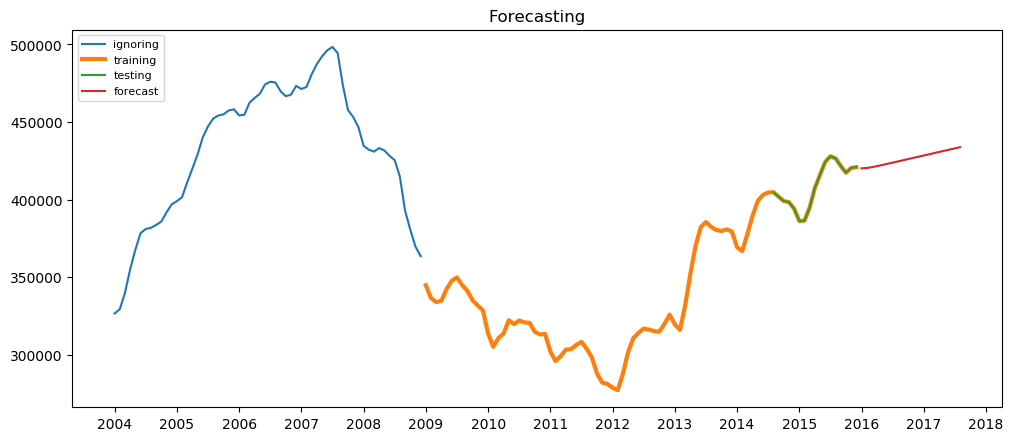

In [27]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 170, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016', '2017', '2018'))
plt.plot(ignore, label='ignoring')
plt.plot(train, label='training',linewidth=3.0)
plt.plot(test, label='testing')
plt.plot(forcast_2016_17, label='forecast')
plt.title('Forecasting')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:
#forecast
forcast_2016_17

144    420241.873298
145    420423.961889
146    420966.383209
147    421646.900215
148    422380.341689
149    423134.066198
150    423895.564076
151    424660.041058
152    425425.659767
153    426191.716037
154    426957.939999
155    427724.228230
156    428490.541090
157    429256.863390
158    430023.189307
159    430789.516611
160    431555.844446
161    432322.172485
162    433088.500602
163    433854.828749
dtype: float64